In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/21_2, artrose.csv'
filename_clean = '../csv_detection_info_clean/21_2, artrose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/21/2, artrose'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
133  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
134  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
135  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
136  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
137  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.12182279.291470025...      476      590   
1    1.2.276.0.7230010.3.0.3.5.1.12182282.122518486...      485      610   
2    1.2.276.0.82.1.1.1430.669053978.192.168.20.148...     1411     1596   
3    1.2.276.0.82.1.1.1430.743780545.10.0.0.103.664...     1307     1507   
4           1.2.276.0.95.17020.20210906.121509.0.0.dcm      533      731   
..                                                 ...      ...      ...   
133  1.3.51.0.7.817540842.53650.41798.36616.3651.49...      150      345   
134  1.3.51.0.7.937708618.24539.13898.36783.60006.1...     1328     1465   
135  1.3.6.1.4.1.19179.1.1164174184218686.3.18820.1...      677      827   
136  1.3.6.1.4.1.19179.1.14424093474161.3.13794.224...      509      659   
137  1.3.6.1.4.1.19179.1.14424093474161.3.13911.224...      777      926   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0        508      621    0.990051    21          2    2, artrose  
1        810      935    0.999990    21          2    2, artrose  
2       1021     1206    0.999782    21          2    2, artrose  
3       1644     1846    0.999730    21          2    2, artrose  
4        713      912    0.999100    21          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
133     1100     1296    0.999959    21          2    2, artrose  
134      807      945    0.999997    21          2    2, artrose  
135      615      765    0.999999    21          2    2, artrose  
136      336      486    0.999998    21          2    2, artrose  
137      871     1020    1.000000    21          2    2, artrose  

[138 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([10, 28, 29, 30], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

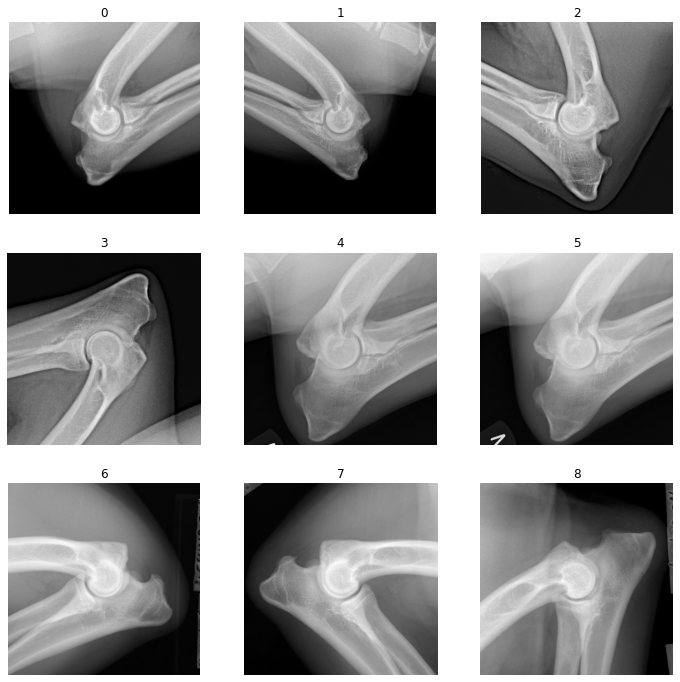

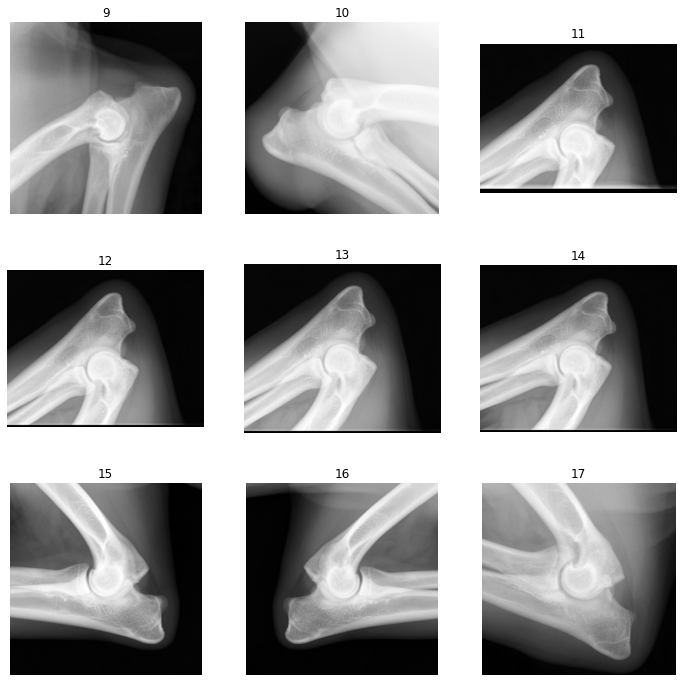

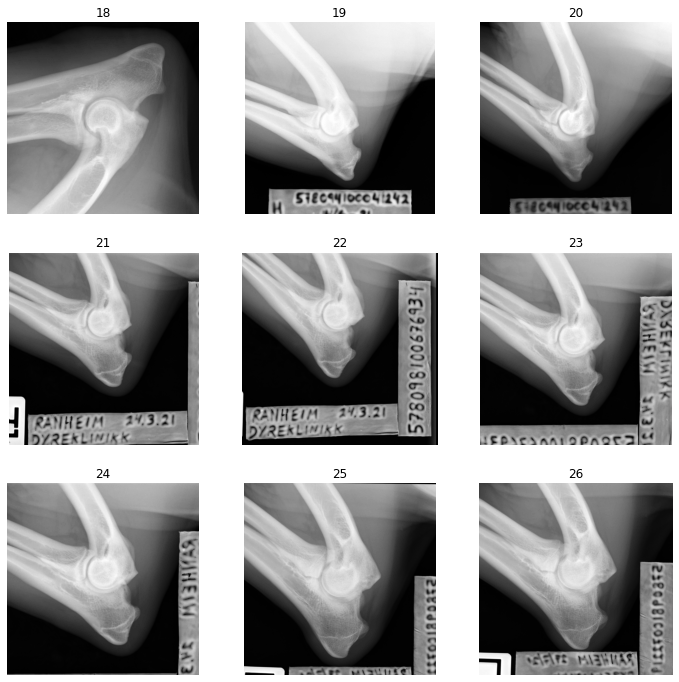

C:\NMBU\TEMP\ipykernel_19708\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_19708\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


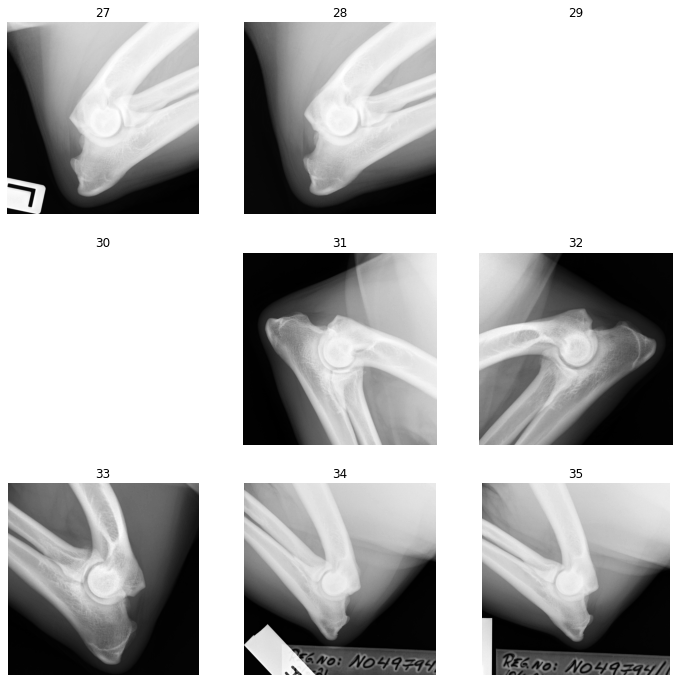

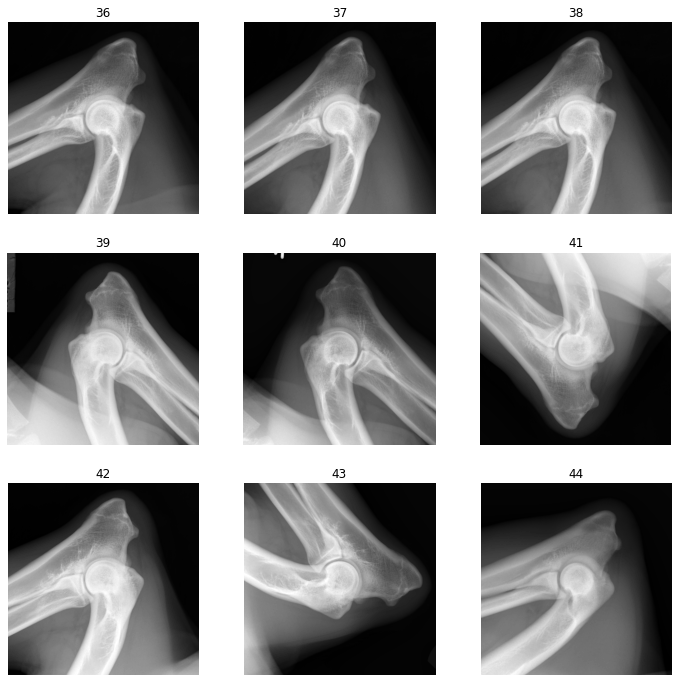

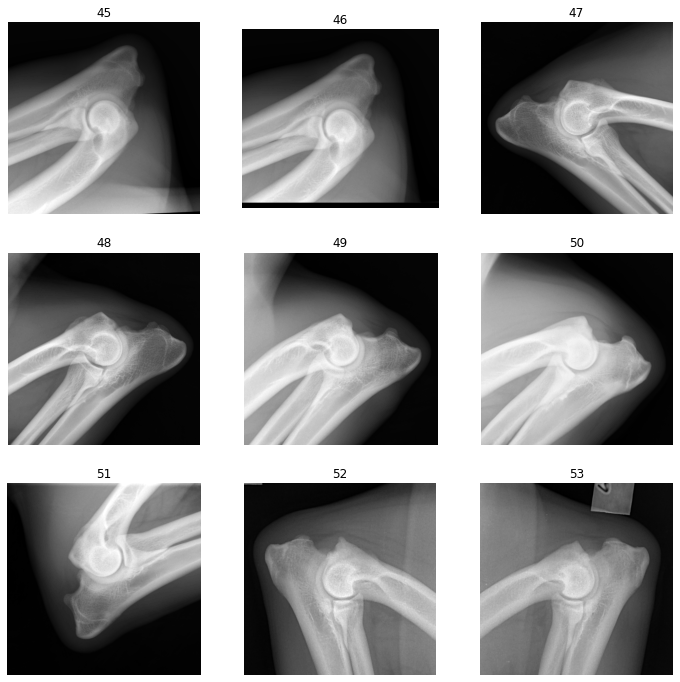

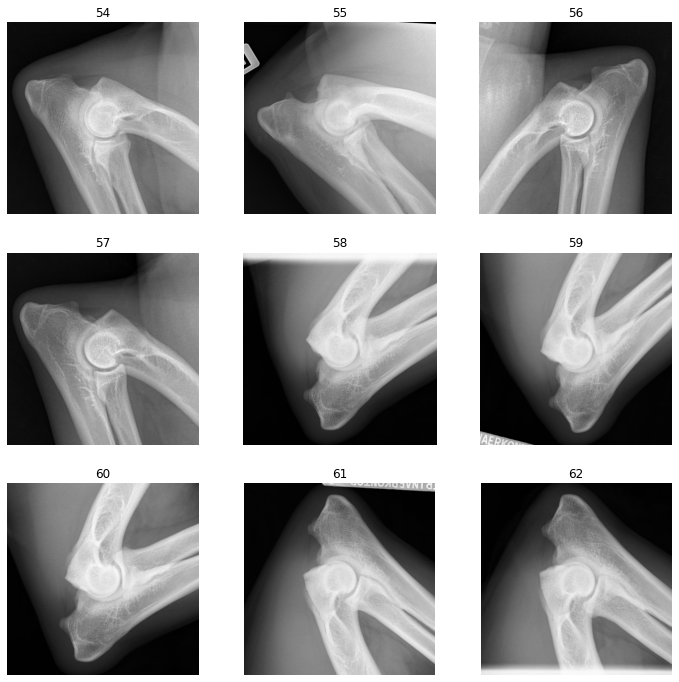

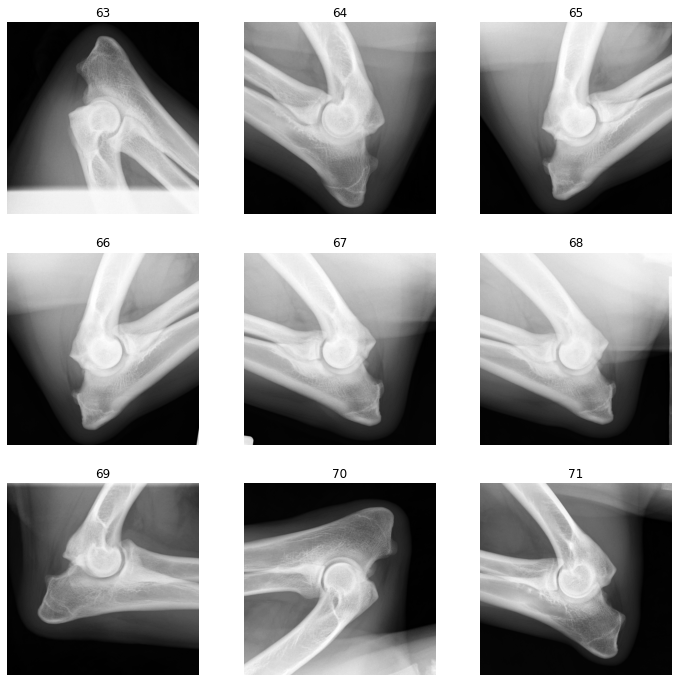

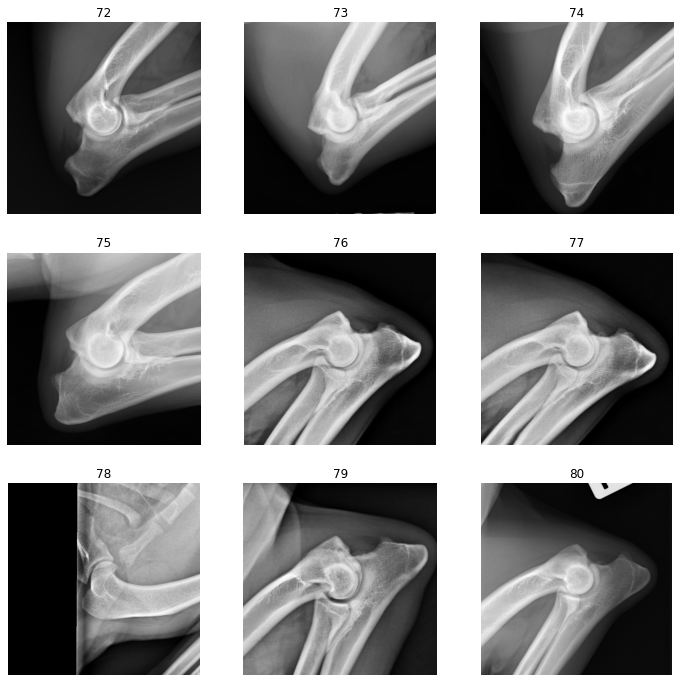

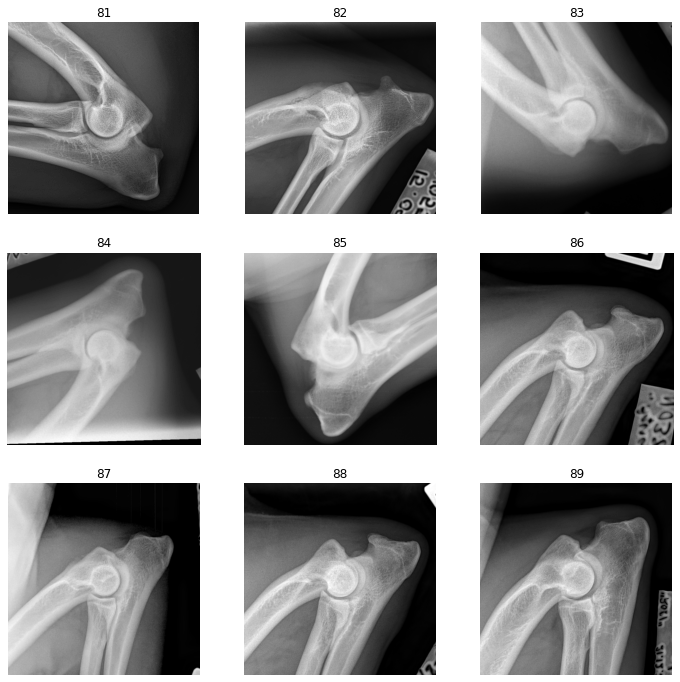

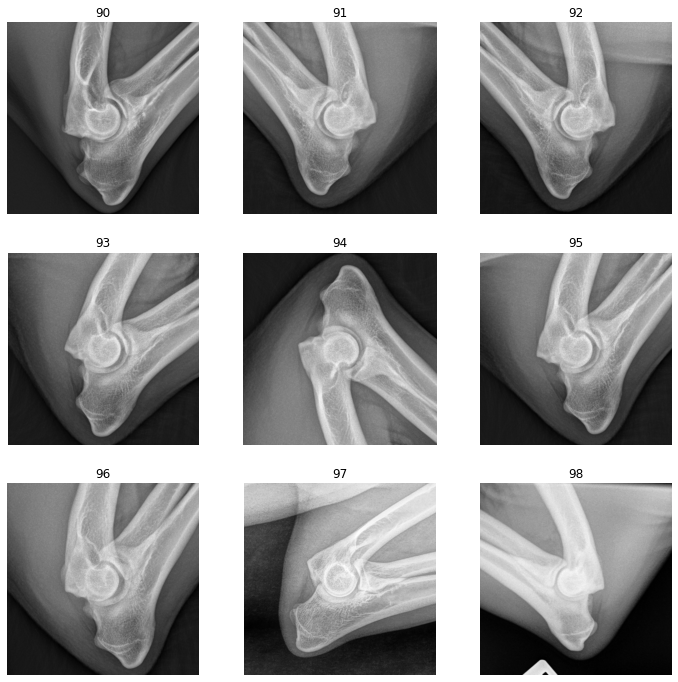

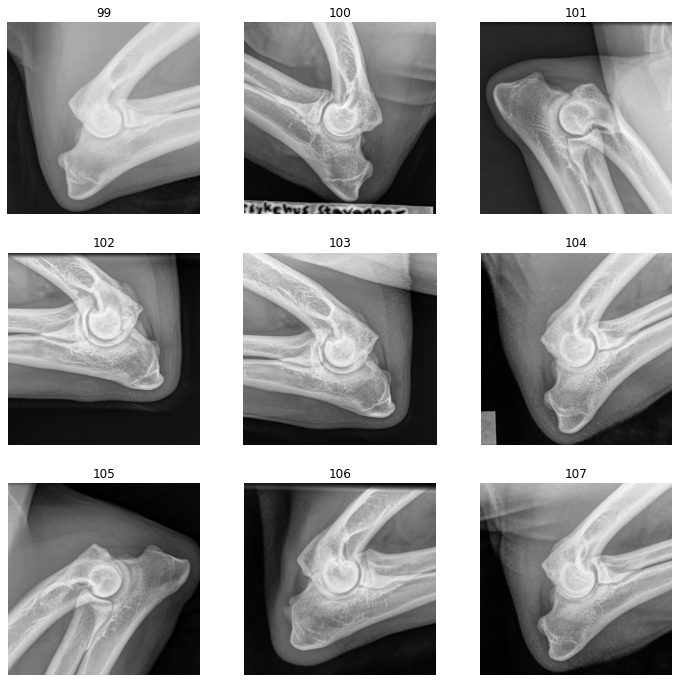

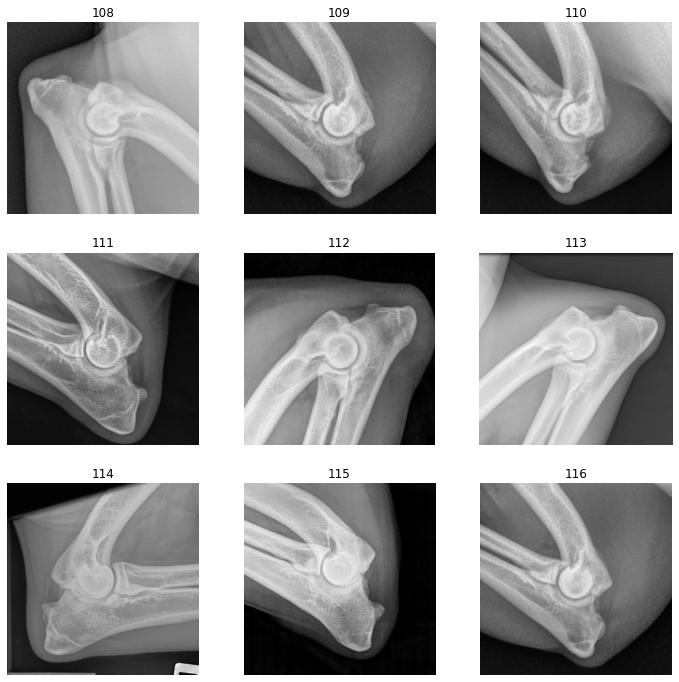

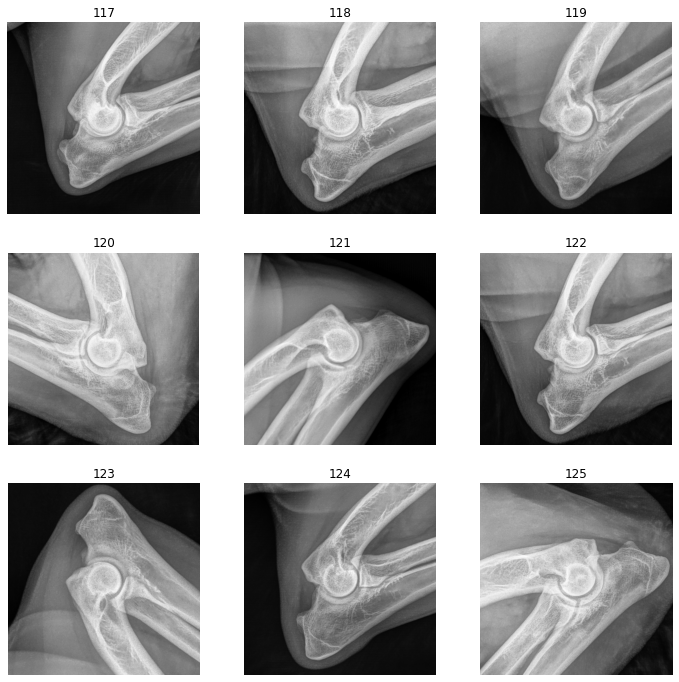

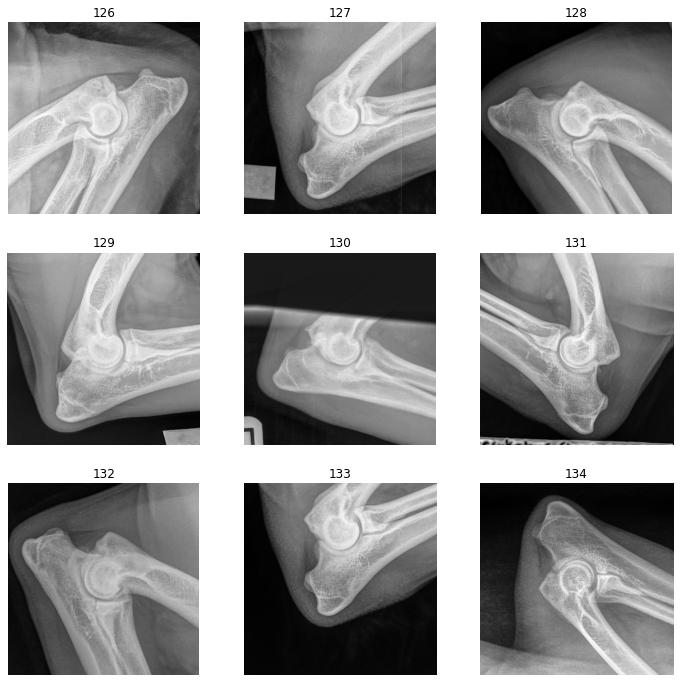

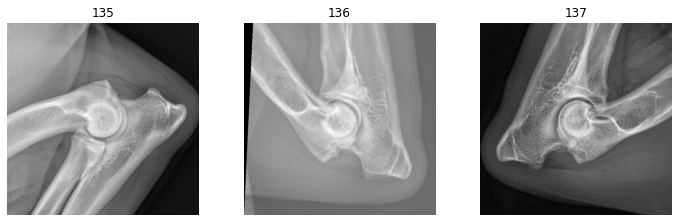

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [29, 30, 78]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
133  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
134  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
135  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
136  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
137  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.12182279.291470025...      476      590   
1    1.2.276.0.7230010.3.0.3.5.1.12182282.122518486...      485      610   
2    1.2.276.0.82.1.1.1430.669053978.192.168.20.148...     1411     1596   
3    1.2.276.0.82.1.1.1430.743780545.10.0.0.103.664...     1307     1507   
4           1.2.276.0.95.17020.20210906.121509.0.0.dcm      533      731   
..                                                 ...      ...      ...   
133  1.3.51.0.7.817540842.53650.41798.36616.3651.49...      150      345   
134  1.3.51.0.7.937708618.24539.13898.36783.60006.1...     1328     1465   
135  1.3.6.1.4.1.19179.1.1164174184218686.3.18820.1...      677      827   
136  1.3.6.1.4.1.19179.1.14424093474161.3.13794.224...      509      659   
137  1.3.6.1.4.1.19179.1.14424093474161.3.13911.224...      777      926   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0        508      621    0.990051    21          2    2, artrose  
1        810      935    0.999990    21          2    2, artrose  
2       1021     1206    0.999782    21          2    2, artrose  
3       1644     1846    0.999730    21          2    2, artrose  
4        713      912    0.999100    21          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
133     1100     1296    0.999959    21          2    2, artrose  
134      807      945    0.999997    21          2    2, artrose  
135      615      765    0.999999    21          2    2, artrose  
136      336      486    0.999998    21          2    2, artrose  
137      871     1020    1.000000    21          2    2, artrose  

[135 rows x 10 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)